In [2]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

# 1. Problem
Reminder: We have N observations of form $(x_1, ... , x_p, y)$ and we want to find fucntion $f: \mathbb{R}^n \to \mathbb{R}$ such that the error $y - f(x_1, ... , x_n)$ is minimum. To be precise we will be minimizing Residual Sum of Squares (RSS) equal to
$$RSS = \sum^N_{i=1} (y - f(x_1, ... , x_n))^2$$

# 2. Decision Trees
A decision tree is one of possible function $f$. It's pretty simple: it divides $x_i$ domain into several seperate sets and on each sets it takes the value equal to the mean of $y$-values in that set. If $y$ is a qualitative variable and we want to have classifying decision tree, instead of the mean we take the most common $y$-value.

How is division into sets done? The procedure is recursive. Firstly we choose one variable $x_j$ and choose some values which it takes. For example we have:
$$
\left\{\begin{array}{ll}
x_5 < 3.14\quad\implies \quad f(x_1, ... , x_n) = 0\\
x_5 \geq 3.14\quad\implies \quad f(x_1, ... , x_n) = 1
\end{array}\right.
$$
The choose of $x_i$ variable (here it is $x_5$) and its value (here 3.14) is optimized to minimize RSS in each step. In the next step we repeat procedure for one of already chosen steps. For example:
$$
\left\{\begin{array}{ll}
x_5 < 3.14\quad \textrm{and} 

\left\{\begin{array}{ll}
x_2 > 4\quad\implies \quad f(x_1, ... , x_n) = 1.2\\
x_2 \leq 4 \quad\implies \quad f(x_1, ... , x_n) = 0.9
\end{array}\right.\quad\\

x_5 \geq 3.14\quad\implies \quad f(x_1, ... , x_n) = 1
\end{array}\right.
$$

We repeat the procedure several times and finally we get the whole tree which look something like:

![title](DT.png)

Advantages of decision trees:
-  easy to interpret (unlike black-box models like neural network),
-  easy to visualize,
-  quite fast.

Disadvantages of decision trees:
- they are simply bad at predicting numerical data,
- finding optimal decision tree with given hyperparameters is almost impossible. Our decision trees are good, but never perfect,
- decision trees are sensitive to small data changes. 

Hyperparameters of a decision tree:
- number of leaves (sets),
- depth (maximum number of times we divide one set),
- size of a leave.

Cool. Time for implementation. Let's fabricate some data.

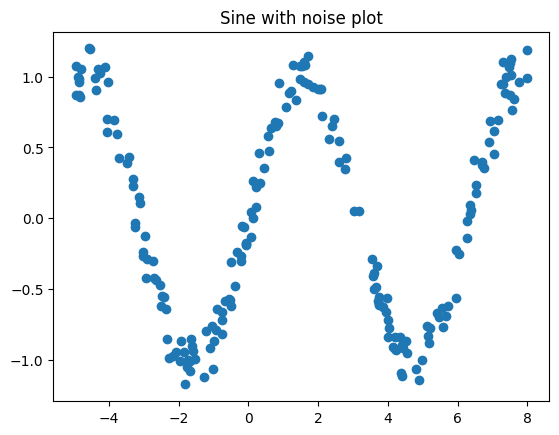

In [3]:
line = np.random.choice(np.linspace(-5, 8, 1000), 200)
line = line.reshape((200, 1))
sin = np.sin(line).ravel()
noise = np.random.normal(scale = 0.1, size = 200)
noisySin = sin + noise

plt.scatter(line, noisySin)
plt.title("Sine with noise plot")
plt.show()

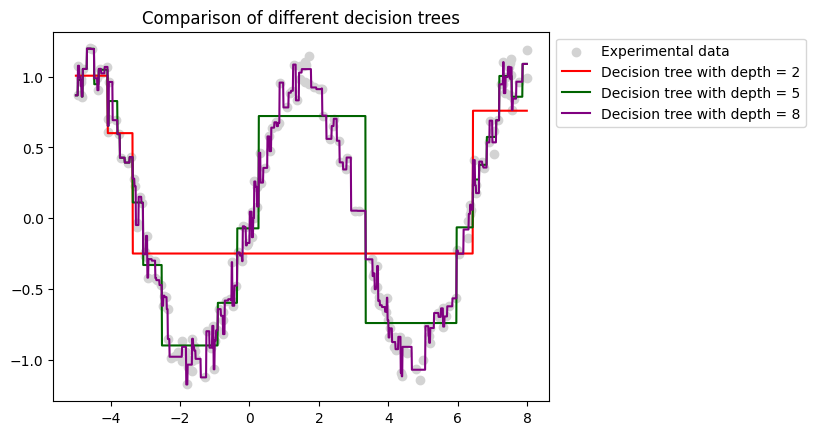

In [90]:
from sklearn.tree import DecisionTreeRegressor

leg = []

# Pure data

plt.scatter(line, noisySin, color = "lightgrey")
leg.append("Experimental data")

# First tree

tree1 = DecisionTreeRegressor(max_depth = 2)
tree1.fit(line, noisySin)
X_test = np.arange(-5, 8, 0.01)[:, np.newaxis]
fitted = tree1.predict(X_test)

plt.plot(X_test, fitted, color = "red")
leg.append("Decision tree with depth = 2")

# Second tree

tree1 = DecisionTreeRegressor(max_depth = 5)
tree1.fit(line, noisySin)
X_test = np.arange(-5, 8, 0.01)[:, np.newaxis]
fitted = tree1.predict(X_test)

plt.plot(X_test, fitted, color = "darkgreen")
leg.append("Decision tree with depth = 5")

# Third tree

tree1 = DecisionTreeRegressor(max_depth = 12 )
tree1.fit(line, noisySin)
X_test = np.arange(-5, 8, 0.01)[:, np.newaxis]
fitted = tree1.predict(X_test)

plt.plot(X_test, fitted, color = "purple")
leg.append("Decision tree with depth = 8")

# Style

plt.legend(leg, bbox_to_anchor = (1,1))
plt.title("Comparison of different decision trees")
plt.show()


# 3. Random forests
In the previous example we had dealt with $y$ that was a function of only one $x_1$. One can not grow a random forest in such a situation. But if we have multiple variables $x_1, ..., x_n$ it is possible.

### How to grow your own random forest?
1. Pick at random $\sim n/3$ variables from $x_1, ..., x_n$.
2. Grow decisive tree using only those variables.
3. Repeat $\sim 500$ times.
4. Now prediction of value of $y$ in some point $(x_1, ..., x_n)$ is the mean of predictions of those 500 trees.

Advantages:
- the predictions are pretty accurate, while risk of overfitting remains low,
- they are less sensitive to small data changes than single decisive trees.

Disadvantages:
- hard to interpret,
- OMFG, they are so slow and occupy so much space.

Time for implementation. We take some classic data frame concerning people with diabetes. In contains measurements of 10 health aspects of 442 people and also a vector of disease progression within one year.

In [91]:
from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from random import sample

# Downloading data

dataFrame = load_diabetes()

# Division data into train and test part

train = sorted(sample(range(0, 441), 442 * 2 // 3))
test = []
for i in range(0, 441):
    if i not in train:
        test.append(i)

Xtrain = dataFrame['data'][train, :]
Xtest = dataFrame['data'][test, :]
Ytrain = dataFrame['target'][train]
Ytest = dataFrame['target'][test]

# Growing a forest

las = RandomForestRegressor(n_estimators = 1)
las.fit(Xtrain, Ytrain)

Ypredict = las.predict(Xtest)

# Does it work?

print("R^2 = %f" %r2_score(Ytest, Ypredict))

R^2 = -0.092633
